<a href="https://colab.research.google.com/github/raimediaz/An-lise-dos-Dados-do-Airbnb---Cidades-Latino-americanas/blob/main/An%C3%A1lise_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Buenos Aires (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2021-12-25/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Com isso em mente, vamos ao projeto.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
dfb = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2021-12-25/visualisations/listings.csv")

### Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
dfb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60523,-58.41042,Entire home/apt,5113,3,1,2011-01-31,0.01,1,365,0,NaN
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,6647,2,27,2021-04-03,0.23,1,236,1,NaN
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59777,-58.39664,Private room,2761,1,20,2017-12-11,0.14,1,0,0,NaN
3,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,1,2018-12-18,0.03,7,365,0,9789
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,0,NaN,NaN,7,365,0,NaN


### **1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [16]:
# identificar o volume de dados do DataFrame
print("Número de entradas:\t {}".format(dfb.shape[0]))
print("Número de variáveis:\t {}\n".format(dfb.shape[1]))
# verificar os tipos de dados do dataset
display(dfb.dtypes)


Número de entradas:	 17318
Número de variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [23]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(dfb.isnull().sum() / dfb.shape[0]).sort_values(ascending = False)


neighbourhood_group               1.000000
license                           0.986026
reviews_per_month                 0.302575
last_review                       0.302575
host_name                         0.000751
name                              0.000289
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

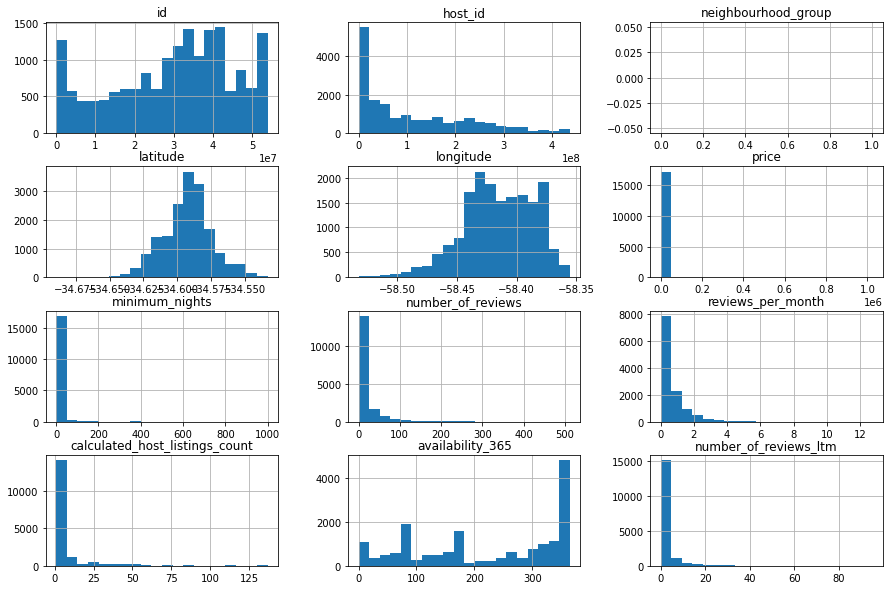

In [52]:
# plotar o histograma das variáveis numéricas
dfb.hist(bins=20, figsize=(15,10));

### **4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [124]:
dfb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.731800e+04,17318.000000,17318.000000,12078.000000,17318.000000,17318.000000
mean,6.587419e+03,7.508719,17.242118,0.669376,8.001155,223.724044
std,3.207039e+04,24.491571,34.802116,0.839172,18.914734,125.834745
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.162000e+03,2.000000,0.000000,0.120000,1.000000,90.000000
50%,3.500000e+03,3.000000,3.000000,0.365000,2.000000,251.000000
75%,5.624000e+03,5.000000,18.000000,0.930000,4.000000,353.000000
max,1.022578e+06,1000.000000,512.000000,12.730000,137.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 5.624000e+03, porém seu valor máximo é 1.022578e+06.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

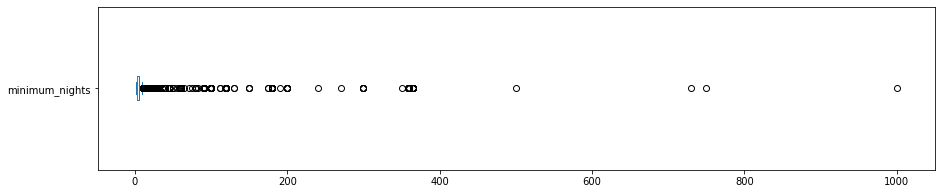


minimum_nights: valores acima de 30
403 entradas
2.3271%


In [72]:
# minimum_nights
dfb.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
# ver quantidade de valores acima de 30 dias para minimum_nights
print("\nminimum_nights: valores acima de 30")
print("{} entradas".format(len(dfb[dfb.minimum_nights > 30])))
print("{:.4f}%".format((len(dfb[dfb.minimum_nights > 30]) / dfb.shape[0])*100))

#### Boxplot para price

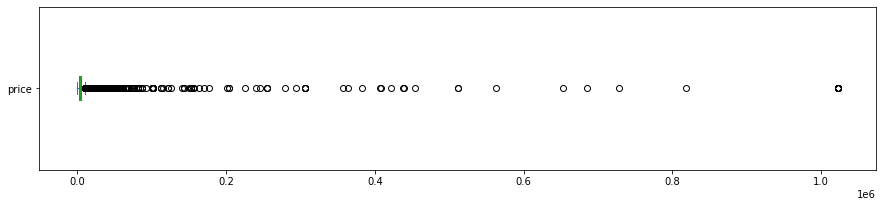


price: valores acima de 1500
15371 entradas
88.7574%


In [76]:
# price
dfb.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(dfb[dfb.price > 1500])))
print("{:.4f}%".format((len(dfb[dfb.price > 1500]) / dfb.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

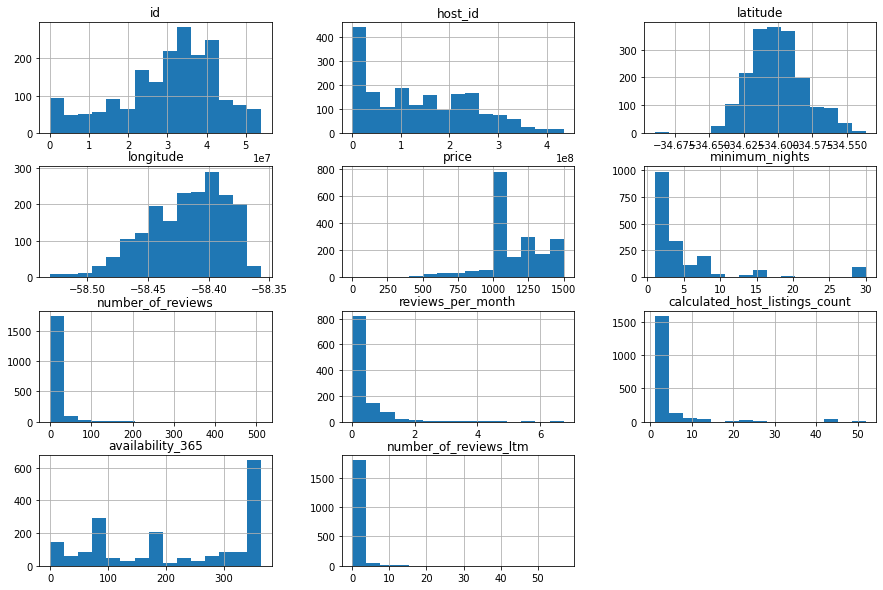

In [77]:
# remover os *outliers* em um novo DataFrame
dfb_clean = dfb.copy()
dfb_clean.drop(dfb_clean[dfb_clean.price > 1500].index, axis=0, inplace=True)
dfb_clean.drop(dfb_clean[dfb_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
dfb_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
dfb_clean.hist(bins=15, figsize=(15,10));

### **5. Qual a média dos preços de aluguel?**

In [81]:
# ver a média da coluna `price``
dfb_clean.price.mean()

1124.567581837381

### **6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [86]:
# criar uma matriz de correlação
corr = dfb_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.006238,0.114922,0.142890,-0.036049,-0.083915
minimum_nights,0.006238,1.000000,-0.050319,-0.075679,0.071610,-0.025916
number_of_reviews,0.114922,-0.050319,1.000000,0.820996,-0.031372,-0.113985
reviews_per_month,0.142890,-0.075679,0.820996,1.000000,-0.085456,-0.122023
calculated_host_listings_count,-0.036049,0.071610,-0.031372,-0.085456,1.000000,0.095112
availability_365,-0.083915,-0.025916,-0.113985,-0.122023,0.095112,1.000000


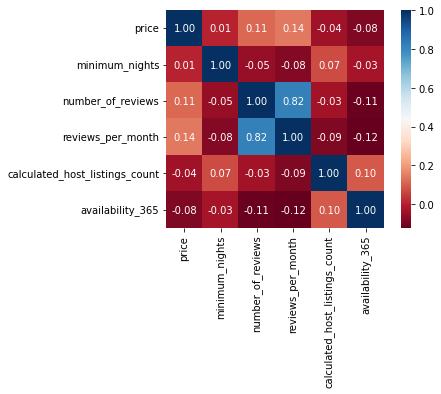

In [98]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [99]:
# mostrar a quantidade de cada tipo de imóvel disponível
dfb_clean.room_type.value_counts()

Private room       1198
Entire home/apt     419
Shared room         221
Hotel room           56
Name: room_type, dtype: int64

In [102]:
# mostrar a porcentagem de cada tipo de imóvel disponível
dfb_clean.room_type.value_counts() / dfb_clean.shape[0]

Private room       0.632524
Entire home/apt    0.221225
Shared room        0.116684
Hotel room         0.029567
Name: room_type, dtype: float64

### **8. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [114]:
# ver preços por bairros, na média, em dólares de 24.04.2022 (114.20 pesos argentinos por dólar)
dfb_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]/114.20


neighbourhood
Villa Pueyrredon    12.539405
Retiro              11.065468
Nuñez               10.880244
Villa Ortuzar       10.789186
Parque Chas         10.781524
Parque Patricios    10.716162
Parque Chacabuco    10.546035
Villa Del Parque    10.504378
Paternal            10.260508
Chacarita           10.209593
Name: price, dtype: float64

Acima, vemos que bairros como Villa Pueryrredon, estão com média de preço superior a de lugares como Chacarita, Paternal e Villa del Parque.

Uma pessoa que não conhecesse Buenos Aires poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Villa Pueryrredon.

In [118]:
# ver quantidade de imóveis no Villa Pueyrredon
print(dfb_clean[dfb_clean.neighbourhood == "Villa Pueyrredon"].shape)

# ver a entrada do Villa Pueyrredon
dfb_clean[dfb_clean.neighbourhood == "Villa Pueyrredon"]

(1, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
13259,41876012,Sergio's place,331139916,Sergio,Villa Pueyrredon,-34.58587,-58.50162,Entire home/apt,1432,4,1,2020-02-13,0.04,1,47,0,NaN


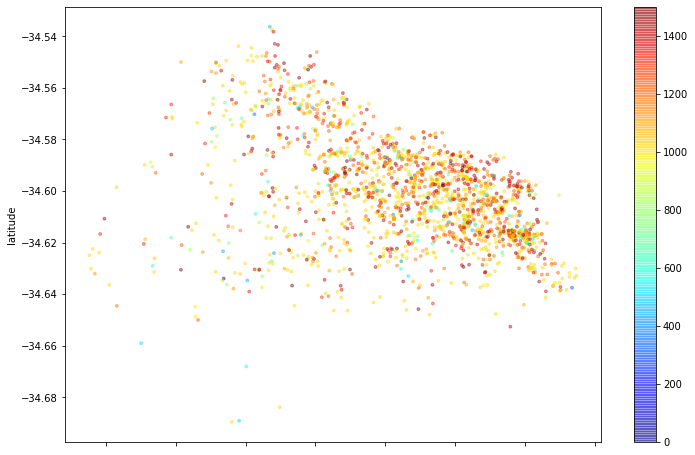

In [119]:
# plotar os imóveis pela latitude-longitude
dfb_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=dfb_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [120]:
# ver a média da coluna `minimum_nights``
dfb_clean.minimum_nights.mean()

5.132523759239704

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.